In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import os

import importlib 

import simulation 
import utils

## Baseline simulation 2A
### Individual learning only

collective model understanding


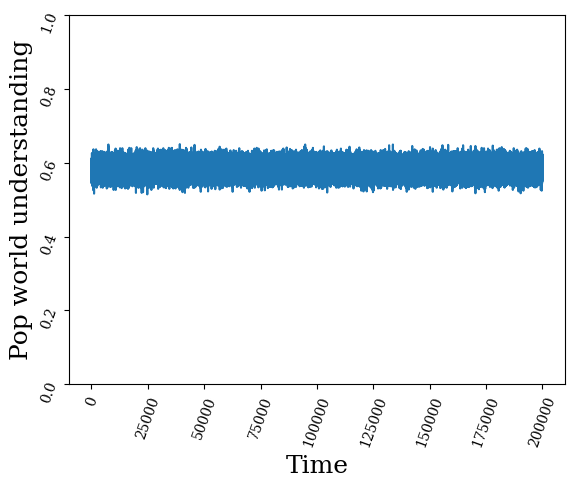

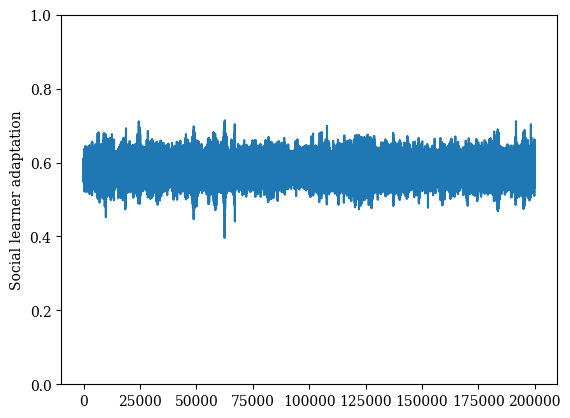

0.5831524949999999


In [43]:
importlib.reload(utils)
importlib.reload(simulation)

%matplotlib inline

params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "u": 0.01,
    # "u": 0.2,
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_2_baseline_individual_only" # Name of current simulation (will be used in figure filenames)
}



social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

Text(0, 0.5, 'Pop World Understanding')

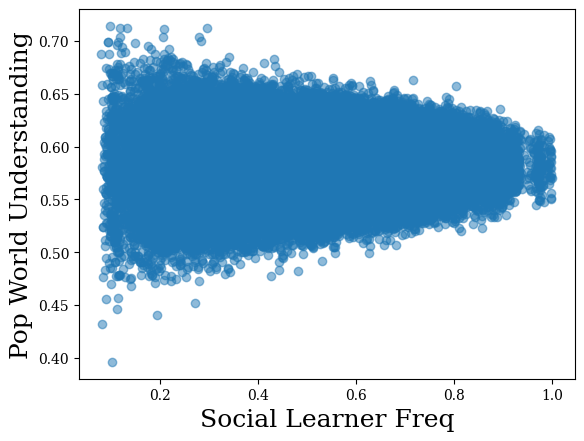

In [44]:
plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)

## Baseline simulation 2B
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people

collective model understanding


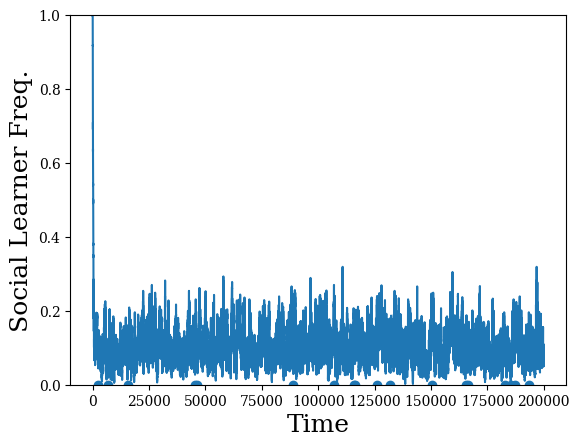

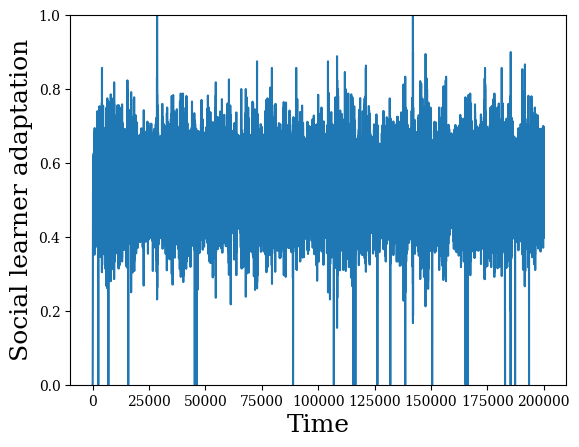

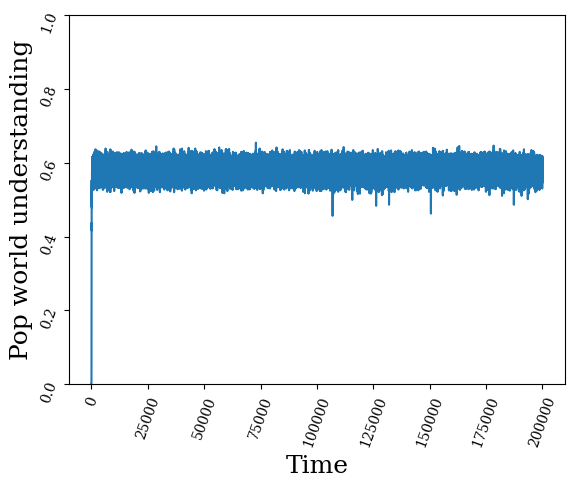

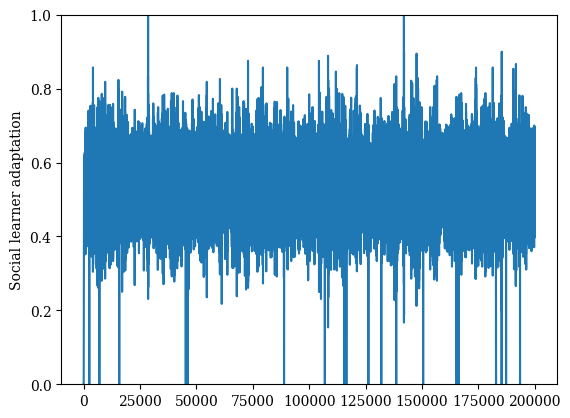

0.57818851


In [24]:
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "human", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_2_baseline_original_RP" # Name of current simulation (will be used in figure filenames)
}



social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

Text(0, 0.5, 'Pop World Understanding')

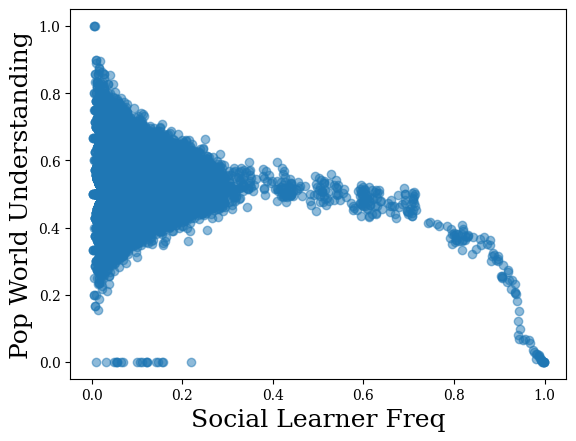

In [25]:
plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)

## Baseline simulation 2C
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people, or socially from the AI
### AI learns socially from the mean the population

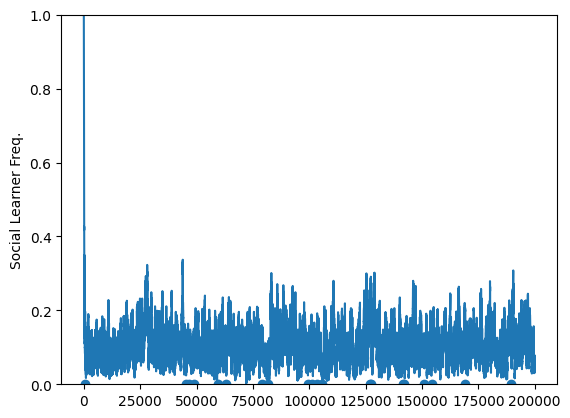

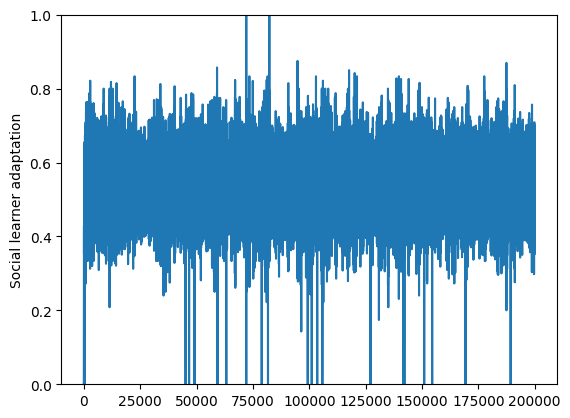

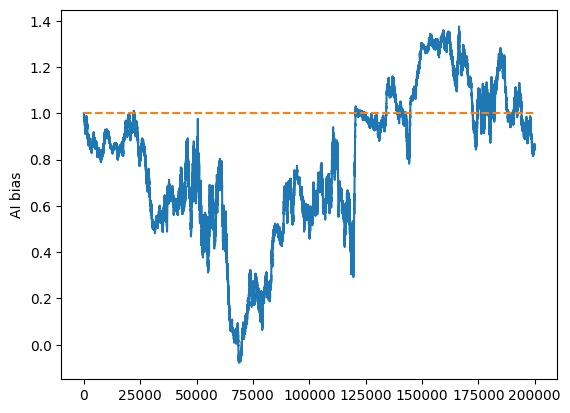

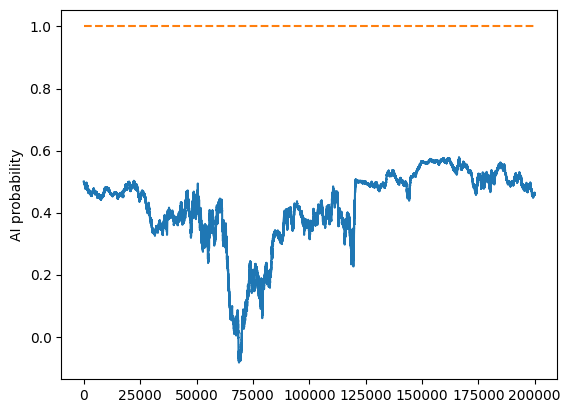

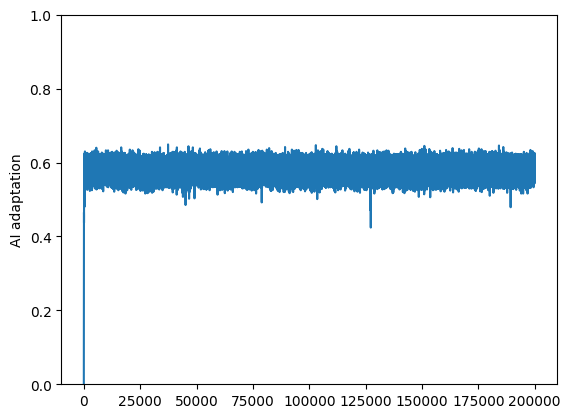

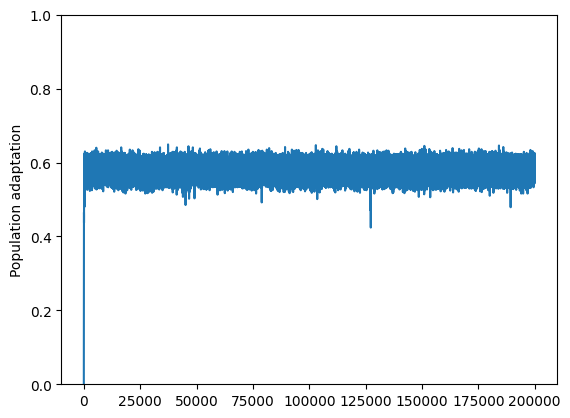

0.57824132


In [9]:


# Convert parameters to dictionary for Numba compatibility
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_2_baseline_ai" # Name of current simulation (will be used in figure filenames)
}

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

### Technically, conditional learning is "cheating" because you get to make 2 attempts in one timestep, 
### so this next cell is the normal RP setup but everyone gets to repeat their action a second time if it fails, as a "fairer" baseline
### Exclude this from current paper, but actually this is key result undermining critical social learning literature conclusions. 
### Note: Fitness stays near maximal limit until individual learning probability falls below environment change rate

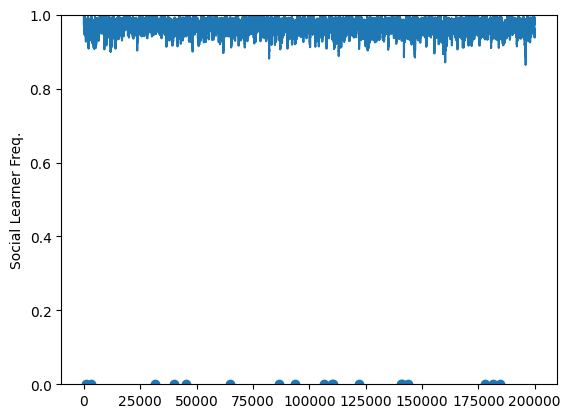

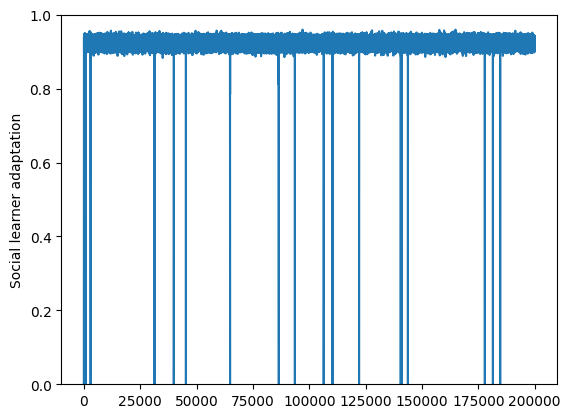

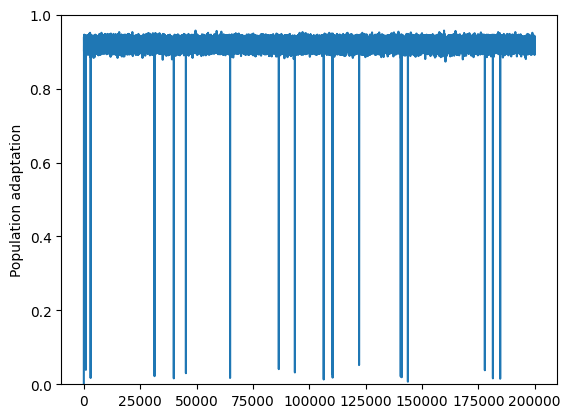

0.9197554350000001


In [10]:
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "human", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": True, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_exclude_baseline_ai_learn_twice" # Name of current simulation (will be used in figure filenames)
}



social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Simulation 3.1.1: "Choose who to learn from"
### Agents learn from AI/other humans or individually
### AI learns socially from mean
### AI unavailable if E[AI]<E[I]
### Note: this is essentially a "who" strategy and as a result it doesn't work

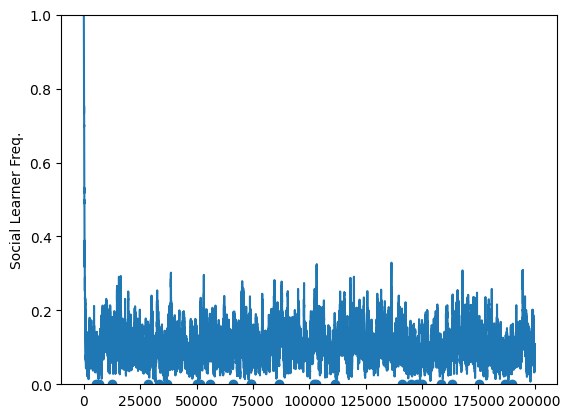

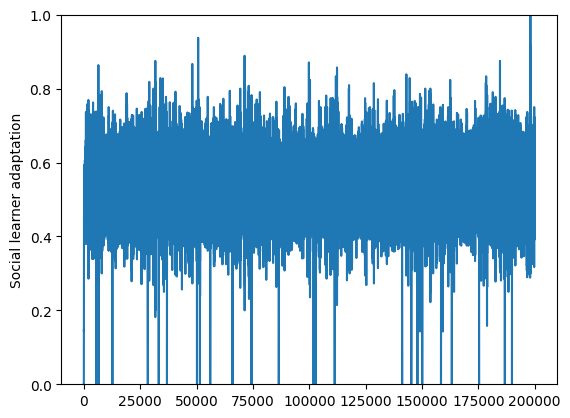

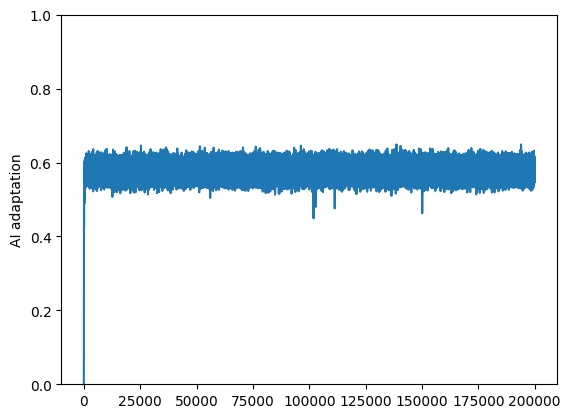

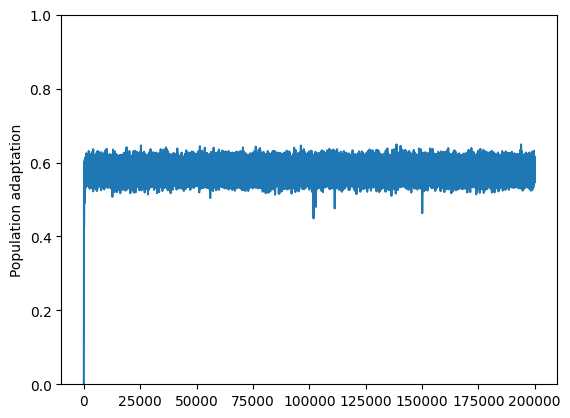

0.578093105


In [19]:


# Convert parameters to dictionary for Numba compatibility
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
        # "u": 0.2, # Environmental change rate

    "c_I": 0.05, # Cost of individual learning
    
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": True, # Should AI resign if E[AI]<E[I]
    "resignation_hint": 1, #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier
    
    # "resignation_hint": 0.1, #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier

    
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_3_1_1_choose_teacher" # Name of current simulation (will be used in figure filenames)
}

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], 
    mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], 
    resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Simulation 3.1.2: "Override AI outputs"
### Agents are critical social learners who first try to learn socially from the AI, and individually if it fails
### AI learns socially from the mean of the population

collective model understanding


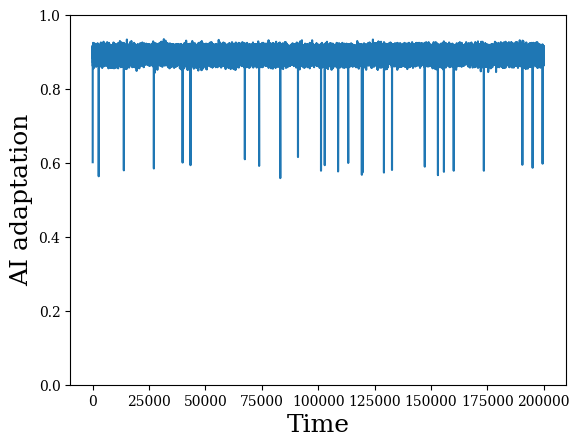

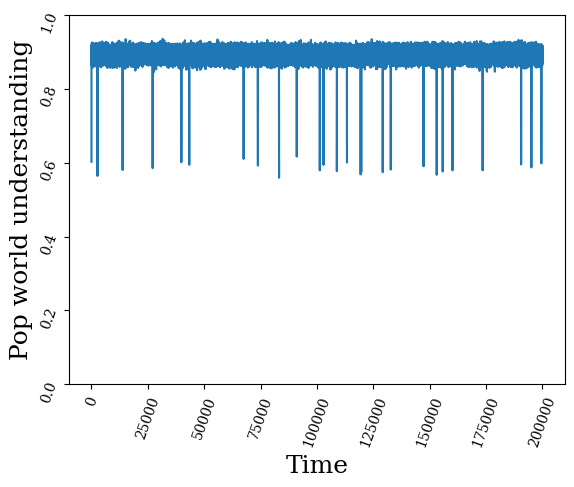

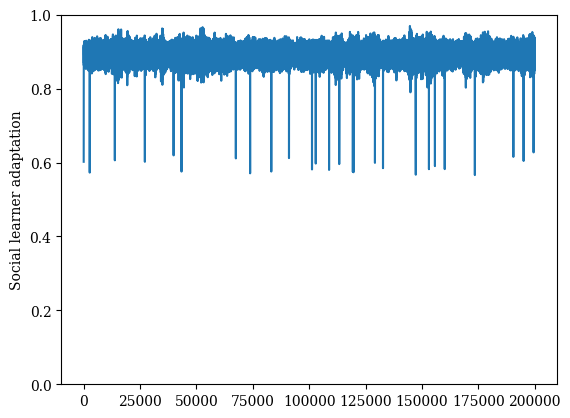

0.8927882600000003


In [26]:
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "ai", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": True, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_3_1_2_override" # Name of current simulation (will be used in figure filenames)
}



social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Feedback loops simulation 2.3
### Agents are critical social learners that can learn individually or socially from the AI
### AI learns socially from the mean or mode of the population
### Socially learning from the AI lowers ability to learn individually, learning individually recovers it

collective model understanding


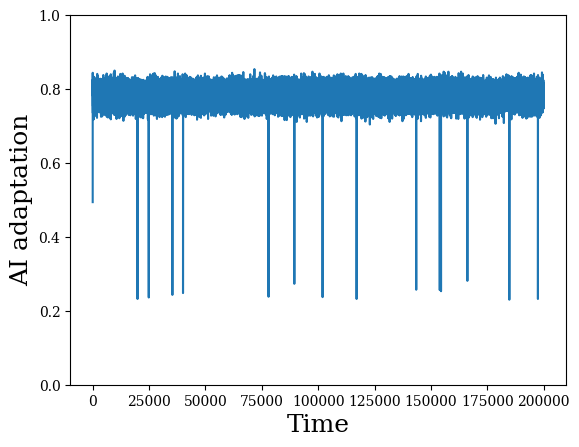

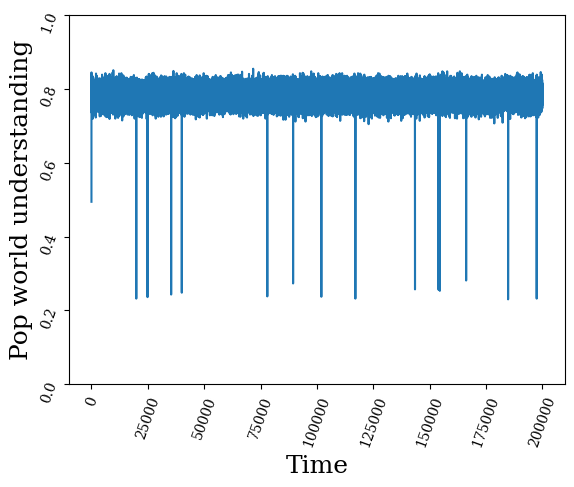

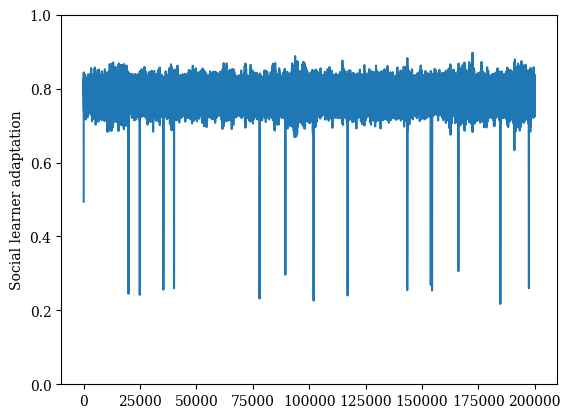

0.7822688000000003


In [27]:
# Convert parameters to dictionary for Numba compatibility
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "ai", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": False, # Should AI resign if E[AI]<E[I]
    "resignation_hint": 1, #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier
    "critical": True, # Is critical social learning enabled
    "ind_penalty_mult": .9, # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_4_neg_feedback" # Name of current simulation (will be used in figure filenames)
}

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

### Feedback loop but can social learn from humans too
### Eventually phases out AI

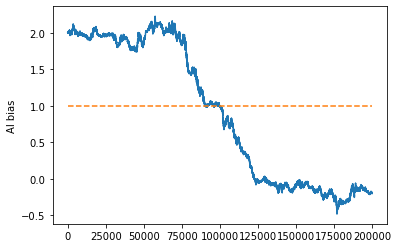

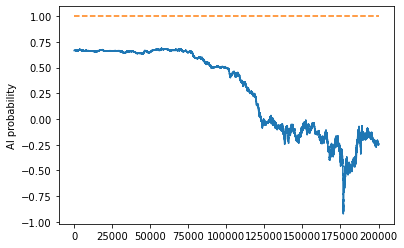

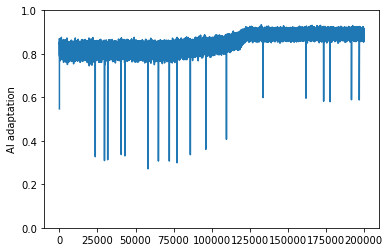

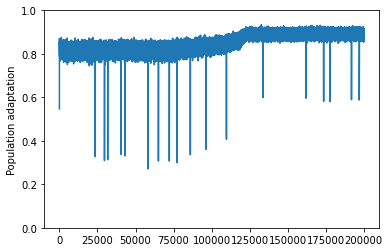

0.851358555


In [10]:
# Convert parameters to dictionary for Numba compatibility
params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 2., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": False, # Should AI resign if E[AI]<E[I]
    "resignation_hint": 1, #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier
    "critical": True, # Is critical social learning enabled
    "ind_penalty_mult": .9, # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_4_neg_feedback_phase_out" # Name of current simulation (will be used in figure filenames)
}

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

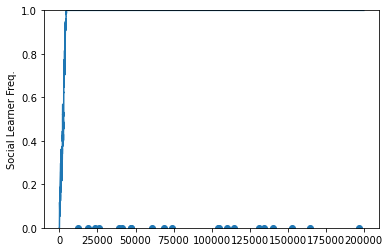

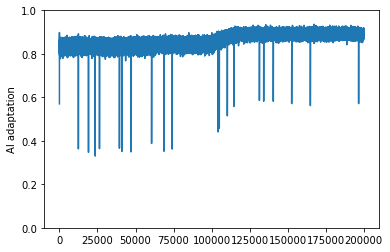

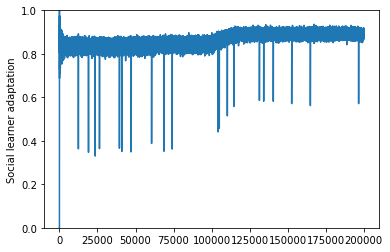

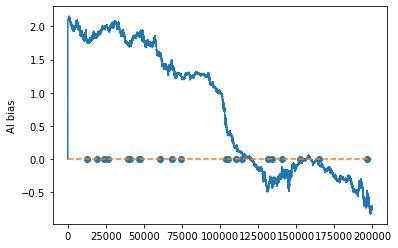

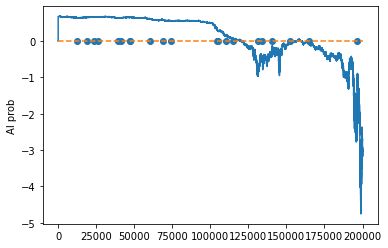

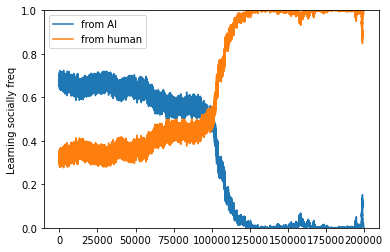

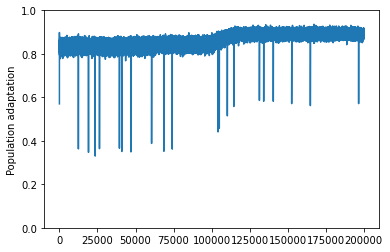

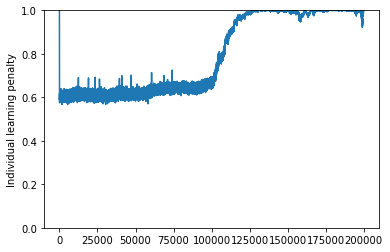

In [119]:
# Need to refactor code a little more to add the plotting functions from here (specifically need to add counter for learning from AI vs humans). 

import matplotlib.pyplot as plt
inds=np.where(change_points)
plt.plot(range(params_dict['n_records']), social_freqs)
plt.ylim((0,1))
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("Social Learner Freq.")
plt.show()

plt.plot(range(params_dict['n_records']), ai_adaptation)
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("AI adaptation")
plt.show()

window_size = 1
averaged_adaptation = np.convolve(social_learner_adaptation, np.ones(window_size)/window_size, mode='valid')
plt.plot(list(range(params_dict['n_records']))[window_size-1:], averaged_adaptation)
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Social learner adaptation")
plt.show()

k=200000
inds=np.where(change_points[:k])
plt.plot(range(params_dict['n_records'])[:k], (ai_biases)[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI bias")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], (ai_biases/(ai_biases+1))[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI prob")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], ai_learn_freqs[:k],label="from AI")
plt.plot(range(params_dict['n_records'])[:k], human_learn_freqs[:k],label="from human")

plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Learning socially freq")
plt.legend()
plt.savefig("feedback_critical_fromboth_social_learning_freq.png")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], learner_adaptation[:k])
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Population adaptation")
plt.savefig("feedback_critical_fromboth_population_adaptation.png")

plt.show()
plt.plot(range(params_dict['n_records'])[:k], ind_penalties[:k])
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Individual learning penalty")
plt.show()

## Model-centric simulation 3.2.1
### Agents are critical social learners
### AI can learn socially from the mean of the population or do nothing (i.e. vary c_ai)

In [45]:
import copy

# Convert parameters to dictionary for Numba compatibility
params_dict = {
    "N": 1000, # Population size
    "u": 0.05,
    # "u": 0.2, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "ai", # Who can agents socially learn from: "", "human", "ai", "both"
    "critical": True, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "sec_3_2_1_ai_update_freq" # Name of current simulation (will be used in figure filenames)
}

c_AI = np.arange(0, 1.01, 0.1)
scores = []

for c in c_AI:

    social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
        N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
        z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
        social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
    )
    scores.append(np.mean(learner_adaptation))
    # utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)

print(scores)

[np.float64(0.86963648), np.float64(0.8675889199999999), np.float64(0.8644860349999999), np.float64(0.8613577400000001), np.float64(0.85645163), np.float64(0.849406255), np.float64(0.840528805), np.float64(0.827008805), np.float64(0.8033470000000001), np.float64(0.7561927649999999), np.float64(0.58306149)]


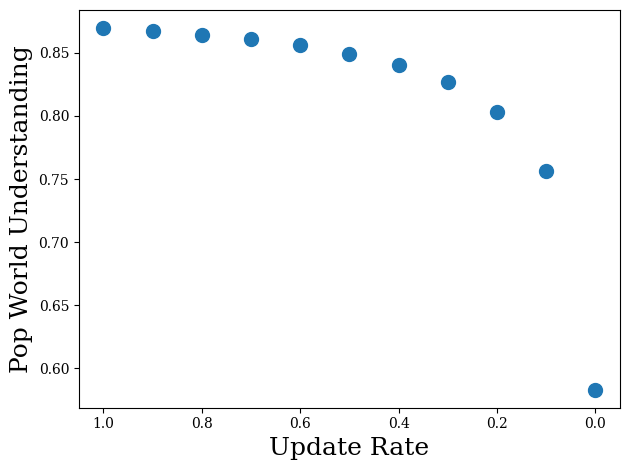

In [46]:
plt.figure()
plt.scatter([1-x for x in c_AI], scores, s=100)
plt.gca().invert_xaxis()  
plt.ylabel("Pop World Understanding", fontsize=18)
plt.xlabel("Update Rate", fontsize=18)
# plt.ylim([0.5, 1.05])
plt.tight_layout()
# plt.savefig("figures/update_schedule.pdf", dpi=400)

In [37]:
scores_fast = scores

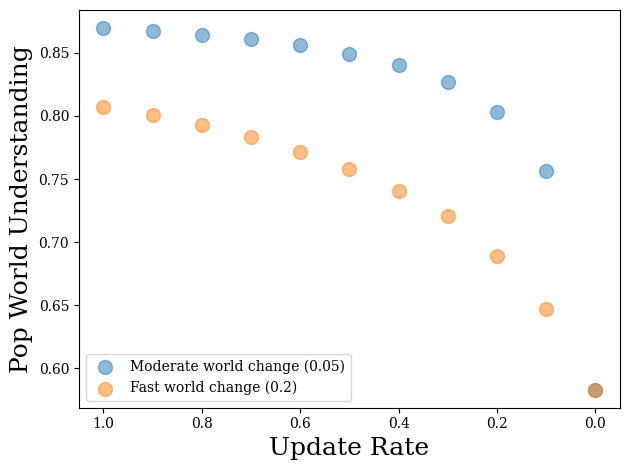

In [48]:
plt.figure()
plt.scatter([1-x for x in c_AI], scores, s=100,label='Moderate world change (0.05)', alpha=0.5)
plt.scatter([1-x for x in c_AI], scores_fast, s=100,label='Fast world change (0.2)', alpha=0.5)
plt.gca().invert_xaxis()  
plt.ylabel("Pop World Understanding", fontsize=18)
plt.xlabel("Update Rate", fontsize=18)
# plt.ylim([0.5, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig("figures/update_schedule.pdf", dpi=400)

## Model-centric simulation 3.2.2
### Agents can learn individually or socially from the AI
### AI can learn individually or socially from the mean of the population

V2